## Ссылка на диск с картированными чтениями


| | SRA accession  | Stage    |
|---:|:-------------|:-----------|
| 1 | SRR5836473  | 8 cell       |
| 2 | SRR3824222 | Epiblast    |
| 3 | SRR5836475  | ICM       |


[Bam-файлы и отчеты](https://drive.google.com/drive/folders/1athn52a93obOwfuHynDCRPRhjAPB80aO?usp=sharing)

# Установка FastQC

In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip
!chmod a+x FastQC/fastqc

Можно получать данные секвенировия с ENA. Например, https://www.ebi.ac.uk/ena/browser/view/SRR5836473

In [ ]:
! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
# ! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_2.fastq.gz

--2024-01-20 10:30:58--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
           => ‘SRR5836473_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR583/003/SRR5836473 ... done.
==> SIZE SRR5836473_1.fastq.gz ... 6856386252
==> PASV ... done.    ==> RETR SRR5836473_1.fastq.gz ... done.
Length: 6856386252 (6.4G) (unauthoritative)

SRR5836473_1.fastq. 100%[===================>]   6.38G  36.9MB/s    in 3m 23s  

2024-01-20 10:34:22 (32.1 MB/s) - ‘SRR5836473_1.fastq.gz’ saved [6856386252]



Анализ QC прочтений

In [ ]:
!gunzip SRR5836473_1.fastq.gz
!./FastQC/fastqc SRR5836473_1.fastq

Started analysis of SRR5836473_1.fastq
Approx 5% complete for SRR5836473_1.fastq
Approx 10% complete for SRR5836473_1.fastq
Approx 15% complete for SRR5836473_1.fastq
Approx 20% complete for SRR5836473_1.fastq
Approx 25% complete for SRR5836473_1.fastq
Approx 30% complete for SRR5836473_1.fastq
Approx 35% complete for SRR5836473_1.fastq
Approx 40% complete for SRR5836473_1.fastq
Approx 45% complete for SRR5836473_1.fastq
Approx 50% complete for SRR5836473_1.fastq
Approx 55% complete for SRR5836473_1.fastq
Approx 60% complete for SRR5836473_1.fastq
Approx 65% complete for SRR5836473_1.fastq
Approx 70% complete for SRR5836473_1.fastq
Approx 75% complete for SRR5836473_1.fastq
Approx 80% complete for SRR5836473_1.fastq
Approx 85% complete for SRR5836473_1.fastq
Approx 90% complete for SRR5836473_1.fastq
Approx 95% complete for SRR5836473_1.fastq
Analysis complete for SRR5836473_1.fastq


# Установка Bismark с зависимостями (+bowtie2, samtools)

In [1]:
! pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
! conda install -c bioconda bismark

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0


Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [3]:
! samtools view


Usage: samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...]

Options:
  -b       output BAM
  -C       output CRAM (requires -T)
  -1       use fast BAM compression (implies -b)
  -u       uncompressed BAM output (implies -b)
  -h       include header in SAM output
  -H       print SAM header only (no alignments)
  -c       print only the count of matching records
  -o FILE  output file name [stdout]
  -U FILE  output reads not selected by filters to FILE [null]
  -t FILE  FILE listing reference names and lengths (see long help) [null]
  -L FILE  only include reads overlapping this BED FILE [null]
  -r STR   only include reads in read group STR [null]
  -R FILE  only include reads with read group listed in FILE [null]
  -q INT   only include reads with mapping quality >= INT [0]
  -l STR   only include reads in library STR [null]
  -m INT   only include reads with number of CIGAR operations consuming
           query sequence >= INT [0]
  -f INT   only include reads with a

Я скопировала файлы на свой диск и теперь скопировала в среду колаба

In [4]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/SRR5836473_1_bismark_bt2_pe.bam /content/SRR5836473_1_bismark_bt2_pe.bam
!cp /content/drive/MyDrive/SRR3824222_1_bismark_bt2_pe.bam /content/SRR3824222_1_bismark_bt2_pe.bam
!cp /content/drive/MyDrive/SRR5836475_1_bismark_bt2_pe.bam /content/SRR5836475_1_bismark_bt2_pe.bam
!cp /content/drive/MyDrive/SRR5836473_1_bismark_bt2_PE_report.txt /content/SRR5836473_1_bismark_bt2_PE_report.txt
!cp /content/drive/MyDrive/SRR3824222_1_bismark_bt2_PE_report.txt /content/SRR3824222_1_bismark_bt2_PE_report.txt
!cp /content/drive/MyDrive/SRR5836475_1_bismark_bt2_PE_report.txt /content/SRR5836475_1_bismark_bt2_PE_report.txt

Mounted at /content/drive


In [5]:
! ls -lh

total 3.8G
-rw-r--r-- 1 root root  21K Feb  8 10:51 condacolab_install.log
drwx------ 5 root root 4.0K Feb  8 10:54 drive
drwxr-xr-x 1 root root 4.0K Feb  6 14:23 sample_data
-rw------- 1 root root 1.9G Feb  8 10:55 SRR3824222_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.8K Feb  8 10:55 SRR3824222_1_bismark_bt2_PE_report.txt
-rw------- 1 root root 769M Feb  8 10:54 SRR5836473_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.8K Feb  8 10:55 SRR5836473_1_bismark_bt2_PE_report.txt
-rw------- 1 root root 1.2G Feb  8 10:55 SRR5836475_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.8K Feb  8 10:55 SRR5836475_1_bismark_bt2_PE_report.txt


In [6]:
! samtools view SRR5836473_1_bismark_bt2_pe.bam | head

SRR5836473.41_41_length=140	99	chr11	40076664	0	140M	=	40076703	178	AATTTTTTTGGGGATTGTATTGAATTTGTAGATTGTTTTTGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATT	KKKKKKKKKKKKKKKFKKKKKKKKKKKKKKFKKKKKKKKKFKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKF7<77FF	NM:i:28	MD:Z:6G0A9C7C9C6C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C1	XM:Z:.................h.......x.........h......h.......hh.......h.........hx..hh...hh.....h.........h...hh..h..x......h..h........h...h..x.....h.	XR:Z:CT	XG:Z:CT
SRR5836473.41_41_length=140	147	chr11	40076703	0	139M	=	40076664	-178	TGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATTTGAAGTTTTTATTATATAGATTTTTTATTTTTTTAGTG	KKKKKAAFFFKKKKKKKKKKKKKFFKKKKKKKKKKFAFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKFKKKKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:31	MD:Z:3C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C8C4C3A4C

In [7]:
! samtools sort SRR5836473_1_bismark_bt2_pe.bam -o sorted_8cell.bam
! samtools sort SRR3824222_1_bismark_bt2_pe.bam -o sorted_epiblast.bam
! samtools sort SRR5836475_1_bismark_bt2_pe.bam -o sorted_icm.bam

[bam_sort_core] merging from 3 files and 1 in-memory blocks...
[bam_sort_core] merging from 9 files and 1 in-memory blocks...
[bam_sort_core] merging from 5 files and 1 in-memory blocks...


In [8]:
! samtools index  sorted_8cell.bam
! samtools index  sorted_epiblast.bam
! samtools index  sorted_icm.bam

### Количество ридов


Сколько ридов закартировалось на 11347700-11367700?

In [9]:
! samtools view sorted_8cell.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view sorted_epiblast.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view sorted_icm.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l

551
1344
797


Сколько ридов закартировалось на 40185800-40195800?

In [10]:
! samtools view sorted_8cell.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l
! samtools view sorted_epiblast.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l
! samtools view sorted_icm.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

194
565
274


### Дедупликация

In [11]:
! deduplicate_bismark  --bam  --paired  -o s_8_cell  SRR5836473_1_bismark_bt2_pe.bam

Output filename was given as: s_8_cell
Processing paired-end Bismark output file(s) (SAM format):
SRR5836473_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836473_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836473_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_8_cell.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR3824222_1.fq,SRR5836473_1.fq,SRR5836473_1.fq -2 SRR3824222_2.fq,SRR5836473_2.fq,SRR5836473_2.fq"

Total number of alignments analysed in SRR5836473_1_bismark_bt2_pe.bam:	285817

In [12]:
! deduplicate_bismark  --bam  --paired  -o s_epiblast  SRR3824222_1_bismark_bt2_pe.bam

Output filename was given as: s_epiblast
Processing paired-end Bismark output file(s) (SAM format):
SRR3824222_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR3824222_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR3824222_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_epiblast.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR3824222_1.fq,SRR5836473_1.fq,SRR5836473_1.fq -2 SRR3824222_2.fq,SRR5836473_2.fq,SRR5836473_2.fq"

Total number of alignments analysed in SRR3824222_1_bismark_bt2_pe.bam:	70

In [13]:
! deduplicate_bismark  --bam  --paired  -o s_icm  SRR5836475_1_bismark_bt2_pe.bam

Output filename was given as: s_icm
Processing paired-end Bismark output file(s) (SAM format):
SRR5836475_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836475_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836475_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_icm.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR5836475_1.fq -2 SRR5836475_2.fq"

Total number of alignments analysed in SRR5836475_1_bismark_bt2_pe.bam:	4170098
Total number duplicated alignments removed:	378125 (9.07%)
Duplicate

In [14]:
! ls

chr11.fa.gz			     sorted_8cell.bam.bai
condacolab_install.log		     sorted_epiblast.bam
drive				     sorted_epiblast.bam.bai
s_8_cell.deduplicated.bam	     sorted_icm.bam
s_8_cell.deduplication_report.txt    sorted_icm.bam.bai
sample_data			     SRR3824222_1_bismark_bt2_pe.bam
s_epiblast.deduplicated.bam	     SRR3824222_1_bismark_bt2_PE_report.txt
s_epiblast.deduplication_report.txt  SRR5836473_1_bismark_bt2_pe.bam
s_icm.deduplicated.bam		     SRR5836473_1_bismark_bt2_PE_report.txt
s_icm.deduplication_report.txt	     SRR5836475_1_bismark_bt2_pe.bam
sorted_8cell.bam		     SRR5836475_1_bismark_bt2_PE_report.txt


### Коллинг метилирования

Вручную скачала 11 хромосому с USCS, разархивировала и вручную добавила в папку mouse_chr

In [15]:
!mkdir mouse_chr

In [16]:
!gunzip chr11.fa.gz

Время работы: ±30 мин

In [17]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_8_cell.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file s_8_cell.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine posit

In [18]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_epiblast.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file s_epiblast.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine pos

In [19]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_icm.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file s_icm.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine position

In [20]:
! ls -lh

total 13G
-rw-r--r-- 1 root root  7.7K Feb  8 11:53 CHG_CTOB_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   13K Feb  8 12:59 CHG_CTOB_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root  9.4K Feb  8 13:38 CHG_CTOB_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root  8.2K Feb  8 11:53 CHG_CTOT_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   14K Feb  8 12:59 CHG_CTOT_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root   10K Feb  8 13:38 CHG_CTOT_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root   51M Feb  8 11:53 CHG_OB_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  157M Feb  8 12:59 CHG_OB_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root   84M Feb  8 13:38 CHG_OB_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root   51M Feb  8 11:53 CHG_OT_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  157M Feb  8 12:59 CHG_OT_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root   85M Feb  8 13:38 CHG_OT_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root  1.1M Feb  8 11:53 CHH_

### Mbias plot and report


Вручную меняю названия файлов spliting_report, Mbias, report, ставя в начало
SRR&&&&&&& _ 1_bismark_bt2_pe

In [21]:
! bismark2report

Found 3 alignment reports in current directory. Now trying to figure out whether there are corresponding optional reports

Writing Bismark HTML report to >> SRR3824222_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR3824222_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR3824222_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> SRR3824222_1_bismark_bt2_pe.deduplication_report.txt <
Processing deduplication report SRR3824222_1_bismark_bt2_pe.deduplication_report.txt ...
Complete

Using the following splitting report:		> SRR3824222_1_bismark_bt2_pe.deduplicated_splitting_report.txt <
Processing splitting report SRR3824222_1_bismark_bt2_pe.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> SRR3824222_1_bismark_bt2_pe.deduplicated.M-bias.txt <
Processing M-bias report SRR3824222_1_bismark_bt2_pe.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, 

### Гистограммы

In [24]:
!pip install pyGenomeTracks
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 63.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.0/334.0 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 69.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 M

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.1/386.1 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [28]:
!conda install conda=23.0.1

Solving environment: \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - conda=23.0.1

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




C кондой были проблемы поэтому я скачала через wget

In [31]:
! wget https://hgdownload-test.gi.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes

--2024-02-08 14:06:24--  https://hgdownload-test.gi.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes
Resolving hgdownload-test.gi.ucsc.edu (hgdownload-test.gi.ucsc.edu)... 128.114.198.32, 2607:f5f0:136:1::26
Connecting to hgdownload-test.gi.ucsc.edu (hgdownload-test.gi.ucsc.edu)|128.114.198.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1405 (1.4K)
Saving to: ‘mm10.chrom.sizes’

mm10.chrom.sizes    100%[===================>]   1.37K  --.-KB/s    in 0s      

2024-02-08 14:06:24 (97.0 MB/s) - ‘mm10.chrom.sizes’ saved [1405/1405]



In [32]:
! conda install -c bioconda ucsc-bedgraphtobigwig

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ucsc-bedgraphtobigwig


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libpng-1.6.42              |       h2797004_0         282 KB  conda-forge
    mysql-connector-c-6.1.11   |    h659d440_1008         1.2 MB  conda-forge
    ucsc-bedgraphtobigwig-455  |       h2a80c09_0         2.4 MB  bioconda
    ------------------------------------------------------------
                                  

In [33]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Fetched 563 kB in 0s (1,667 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 121747 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...


In [34]:
!gunzip s_8_cell.deduplicated.bedGraph.gz
!gunzip s_epiblast.deduplicated.bedGraph.gz
!gunzip s_icm.deduplicated.bedGraph.gz

In [36]:
! head s_8_cell.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	50
chr11	3050047	3050048	66.6666666666667
chr11	3050048	3050049	50
chr11	3050223	3050224	87.5
chr11	3050224	3050225	53.3333333333333
chr11	3050285	3050286	66.6666666666667
chr11	3050286	3050287	33.3333333333333
chr11	3050309	3050310	62.5
chr11	3050310	3050311	50


In [35]:
! bedtools genomecov -bg -ibam s_8_cell.deduplicated.bam -g mm10.chrom.sizes  >  s_8_cell.cover.bedGraph
! bedtools genomecov -bg -ibam s_epiblast.deduplicated.bam -g mm10.chrom.sizes  >  s_epiblast.cover.bedGraph
! bedtools genomecov -bg -ibam s_icm.deduplicated.bam -g mm10.chrom.sizes  >  s_icm.cover.bedGraph


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****

*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****

*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gunzip s_8_cell.deduplicated.bismark.cov.gz
!gunzip s_epiblast.deduplicated.bismark.cov.gz
!gunzip s_icm.deduplicated.bismark.cov.gz

In [41]:
s_8_cell = pd.read_csv('s_8_cell.deduplicated.bismark.cov', sep = '\t', names = ['chr', 'start','stop', 'percent of methylation', 'met', 'nonmet'])
epiblast = pd.read_csv('s_epiblast.deduplicated.bismark.cov', sep = '\t', names = ['chr', 'start','stop', 'percent of methylation', 'met', 'nonmet'])
icm = pd.read_csv('s_icm.deduplicated.bismark.cov', sep = '\t', names = ['chr', 'start','stop', 'percent of methylation', 'met', 'nonmet'])

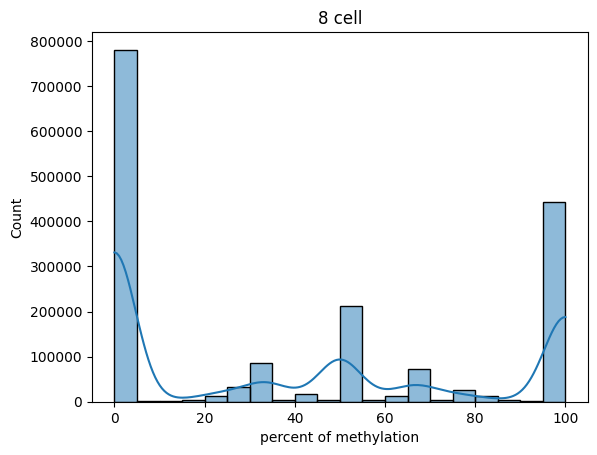

In [42]:
sns.histplot(data = s_8_cell, x = 'percent of methylation', bins = 20, kde = True, kde_kws = {'bw_adjust': 2})
plt.title('8 cell')
plt.savefig('8_cell.png')

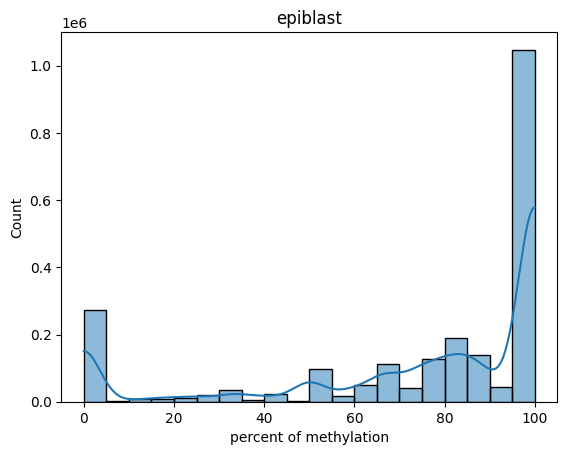

In [43]:
sns.histplot(data = epiblast, x = 'percent of methylation', bins = 20, kde = True, kde_kws = {'bw_adjust': 2})
plt.title('epiblast')
plt.savefig('epiblast.png')

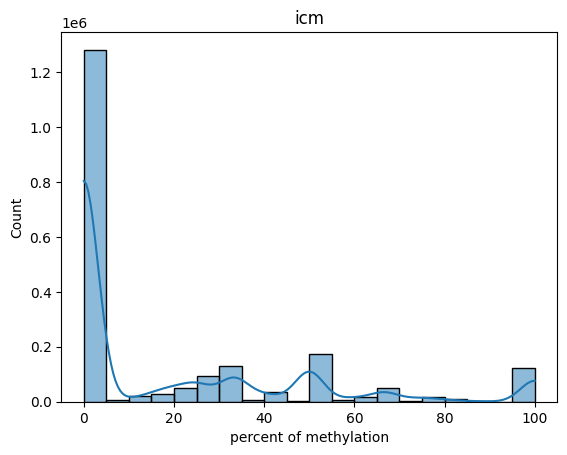

In [44]:
sns.histplot(data = icm, x = 'percent of methylation', bins = 20, kde = True, kde_kws = {'bw_adjust': 2})
plt.title('icm')
plt.savefig('icm.png')

### Уровень покрытия и метелирования

In [51]:
! bedGraphToBigWig  s_8_cell.deduplicated.bedGraph mm10.chrom.sizes s_8_cell_methylation.bigWig.bw
! bedGraphToBigWig  s_epiblast.deduplicated.bedGraph mm10.chrom.sizes epiblast_methylation.bigWig.bw
! bedGraphToBigWig  s_icm.deduplicated.bedGraph mm10.chrom.sizes icm_methylation.bigWig.bw

In [46]:
! bedGraphToBigWig   s_8_cell.cover.bedGraph mm10.chrom.sizes s_8_cell_coverage.bigWig.bw
! bedGraphToBigWig   s_epiblast.cover.bedGraph mm10.chrom.sizes epiblast_coverage.bigWig.bw
! bedGraphToBigWig   s_icm.cover.bedGraph mm10.chrom.sizes icm_coverage.bigWig.bw

In [47]:
! make_tracks_file --trackFiles s_8_cell_coverage.bigWig.bw epiblast_coverage.bigWig.bw icm_coverage.bigWig.bw -o tracks_cov.ini.txt

Adding bigwig file: s_8_cell_coverage.bigWig.bw
Adding bigwig file: epiblast_coverage.bigWig.bw
Adding bigwig file: icm_coverage.bigWig.bw


In [52]:
! make_tracks_file --trackFiles s_8_cell_methylation.bigWig.bw epiblast_methylation.bigWig.bw icm_methylation.bigWig.bw -o tracks_met.ini.txt

Adding bigwig file: s_8_cell_methylation.bigWig.bw
Adding bigwig file: epiblast_methylation.bigWig.bw
Adding bigwig file: icm_methylation.bigWig.bw


In [49]:
! pyGenomeTracks --tracks tracks_cov.ini.txt --region chr11:3100030-3500030 -o image_cov.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [s_8_cell_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [icm_coverage.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.003484010696411133
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [s_8_cell_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [icm_coverage.bigWig]


In [53]:
! pyGenomeTracks --tracks tracks_met.ini.txt --region chr11:3100030-3500030 -o image_met.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [s_8_cell_methylation.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_methylation.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [icm_methylation.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.004194498062133789
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [s_8_cell_methylation.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_methylation.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [icm_methylation.bigWig]
